# Dependencies

In [44]:
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

import matplotlib.pyplot as plt


# Load data set and fist insights

In [214]:
df = pd.read_csv("./amazon.csv")

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.shape

(1465, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# Set column to be used on classification

I will set a product as bestseller when the sales are above 0.90 quartile.

In [226]:
df.rating_count.fillna(0, inplace=True)

In [227]:
def salesToInt(x):
    if "," in str(x):
        int_split = x.split(",")
        return int(int_split[0]+int_split[1])
    
    return int(x)

df["sales"] = df.rating_count.apply(lambda x : salesToInt(x))

In [231]:
df['sales'].quantile([0.25, 0.5, 0.75,0.90])

0.25      928.0
0.50     4415.0
0.75    14629.0
0.90    30411.0
Name: sales, dtype: float64

In [309]:
# this function set a quality value based on rating
def setCategorization(sales):
    
    if sales >= 30411:
        return 1 # Best sellers
    
    return 0 # regular

# save quality value on a new column "quality"
df["product_category"] = df.sales.apply(lambda x: setCategorization(x))

I will also create a single field with both product name and description.

In [283]:
df["description"] = df.product_name + "|" + df.about_product

# Keras Tokenizer

Now we move trought the model with a Tensorflow Keras tokenizer. It will first building a vocabulary of all unique words in the text data. Then, each word is assigned a unique integer value. The Tokenizer then replaces each word in the text with its corresponding integer value.

In [246]:
# intializing keras tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")

In [310]:
from sklearn.model_selection import train_test_split

X = df["description"]
y = df["product_category"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1901)



In [311]:
# set all parameter
num_words = 5000
embedding_dim = 16
maxlen = 150
truncating = 'post'
oov_token = '<OOV>'
padding_type = 'post'

In [312]:
#create the tokenizer for x_train
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [301]:
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=maxlen, truncating=truncating)
testing_sentences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sentences, maxlen=maxlen)

In [348]:
#initialize model whit basic hyper parameters
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words,  embedding_dim, input_length=maxlen),
    tf.keras.layers.LSTM(64, dropout=0.1,use_bias = False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [349]:
# set a loss, optimizer and metric
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [329]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 16)           80000     
                                                                 
 lstm_19 (LSTM)              (None, 64)                20480     
                                                                 
 dense_86 (Dense)            (None, 16)                1040      
                                                                 
 dense_87 (Dense)            (None, 64)                1088      
                                                                 
 dense_88 (Dense)            (None, 256)               16640     
                                                                 
 dense_89 (Dense)            (None, 64)                16448     
                                                                 
Total params: 135,696
Trainable params: 135,696
Non-t

In [343]:
# y_train and y_test to array
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

In [350]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=50)

# run the model on y_train and y_test
num_epochs = 10000
history = model.fit(padded, y_train_arr, epochs=num_epochs, validation_data=(testing_padded, y_test_arr), batch_size=32, callbacks=[early_stop])

Epoch 1/10000
37/37 [==============================] - 2s 34ms/step - loss: 0.4971 - accuracy: 0.8882 - val_loss: 0.3034 - val_accuracy: 0.9078
Epoch 2/10000
37/37 [==============================] - 1s 30ms/step - loss: 0.2984 - accuracy: 0.8968 - val_loss: 0.3124 - val_accuracy: 0.9078
Epoch 3/10000
37/37 [==============================] - 1s 30ms/step - loss: 0.2106 - accuracy: 0.8968 - val_loss: 0.2877 - val_accuracy: 0.9078
Epoch 4/10000
37/37 [==============================] - 1s 31ms/step - loss: 0.1207 - accuracy: 0.9420 - val_loss: 0.3687 - val_accuracy: 0.8601
Epoch 5/10000
37/37 [==============================] - 1s 30ms/step - loss: 0.0779 - accuracy: 0.9744 - val_loss: 0.4430 - val_accuracy: 0.8908
Epoch 6/10000
37/37 [==============================] - 1s 30ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.4738 - val_accuracy: 0.8840
Epoch 7/10000
37/37 [==============================] - 1s 32ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.5022 - val_accuracy:

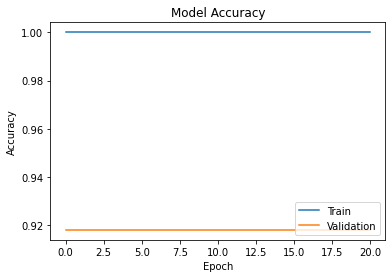

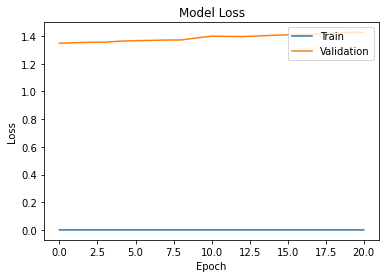

In [338]:
# Extract accuracy and loss data for training and validation sets
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()